## 4. Exploratory Data Analysis

### Importing Neccessary Libraries and Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.externals import joblib
from sklearn.linear_model import Ridge
df = pd.read_csv('coffee.csv')
df.shape

(1311, 44)

### Dropping the columns which we're not going to use in Analysis

In [3]:
df.drop(['Species', 'Unnamed: 0', 'Owner', 'Owner.1', 'Producer', 'In.Country.Partner', 'Variety', 'ICO.Number', 'Altitude', 'Certification.Address', 'Certification.Contact', 'unit_of_measurement', 'Lot.Number', 'altitude_low_meters', 'altitude_high_meters', 'Expiration', 'Certification.Body', 'Processing.Method' , 'Color', 'Grading.Date'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country.of.Origin     1310 non-null   object 
 1   Farm.Name             955 non-null    object 
 2   Mill                  1001 non-null   object 
 3   Company               1102 non-null   object 
 4   Region                1254 non-null   object 
 5   Number.of.Bags        1311 non-null   int64  
 6   Bag.Weight            1311 non-null   object 
 7   Harvest.Year          1264 non-null   object 
 8   Aroma                 1311 non-null   float64
 9   Flavor                1311 non-null   float64
 10  Aftertaste            1311 non-null   float64
 11  Acidity               1311 non-null   float64
 12  Body                  1311 non-null   float64
 13  Balance               1311 non-null   float64
 14  Uniformity            1311 non-null   float64
 15  Clean.Cup            

##### 

### Dataset Summary

In [4]:
df.describe()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000
mean,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1784.196379
std,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.016913
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000
50%,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000
75%,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000
max,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000


<AxesSubplot:>

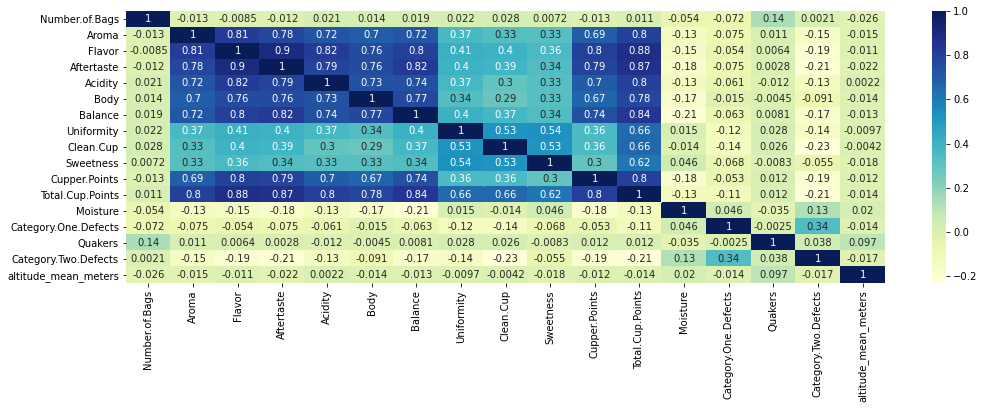

In [5]:
plt.figure(figsize=(17,5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

In [6]:
bag_weight = []
for item in df['Bag.Weight']:
    if ' kg,lbs' in item:item = int(item.replace(' kg,lbs', ''))
    elif ' kg' in item:item = int(item.replace(' kg', ''))
    elif ' lbs' in item:
        item = int(item.replace(' lbs', ''))
        item = 0.453592*item 
    elif ',lbs' in item:
        item = int(item.replace(',lbs', ''))
        item = 0.453592*item
    else:item = int(item)
    bag_weight.append(item)
df['Bag.Weight'] = pd.Series(bag_weight)

#### Feature Extraction:
Extracting the total quantity of coffee produced  and droping individual columns

In [7]:
df['Total Quantity Produced kg'] = df['Number.of.Bags']*df['Bag.Weight']
df.drop(['Number.of.Bags', 'Bag.Weight'], axis=1, inplace = True)

### Counting of Countries

In [8]:
df_countries = pd.DataFrame(df['Country.of.Origin'].value_counts()).reset_index()
df_countries.columns = ['Country', 'No. of Coffee Farms']
df_countries.head(5)

,Country,No. of Coffee Farms
0,Mexico,236
1,Colombia,183
2,Guatemala,181
3,Brazil,132
4,Taiwan,75


### Analyzing Region with Coffee Farms

In [9]:
df_region = pd.DataFrame(df['Region'].value_counts()).reset_index()
df_region.columns = ['Region Name', 'No. of Farms']
print(df_region.head(2))
a = list(df_region.head(1)['Region Name'])
a = list(df[df['Region'] == a[0]]['Country.of.Origin'])
print('Huila lies in, '+str(a[0]))

  Region Name  No. of Farms
0       huila           112
1     oriente            80
Huila lies in, Colombia


## 5. Visualization

Removing the outlier which is affecting out model efficieny. The outlier has most of coffee quality features as 0. It seems it is irrelevant data. So, we omit this row. Same for 'Acidity' and 'Body' feature.

In [10]:
df = df[df['Flavor']!=0]
df = df[df['Acidity']>5.50]
df = df[df['Body']>5.50]

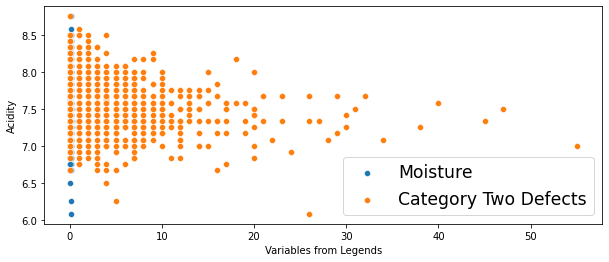

In [11]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(x = 'Moisture', y = 'Acidity', data = df)
sns.scatterplot(x = 'Category.Two.Defects', y = 'Acidity', data = df, markers='s')
plt.legend(['Moisture', 'Category Two Defects'], loc='lower right', fontsize='xx-large')
plt.xlabel('Variables from Legends')
plt.show()

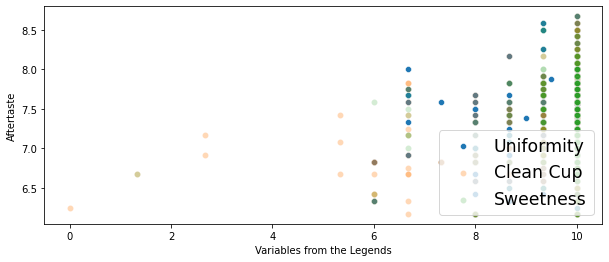

In [12]:
plt.figure(figsize=(10,4))
ax5 = sns.scatterplot(x = 'Uniformity' , y = 'Aftertaste', data = df)
ax6 = sns.scatterplot(x = 'Clean.Cup' , y = 'Aftertaste', data = df, alpha=0.3)
ax7 = sns.scatterplot(x = 'Sweetness' , y = 'Aftertaste', data = df, alpha=0.2)
plt.legend(['Uniformity', 'Clean Cup', 'Sweetness'], loc='lower right', fontsize='xx-large')
plt.xlabel('Variables from the Legends')
plt.show()

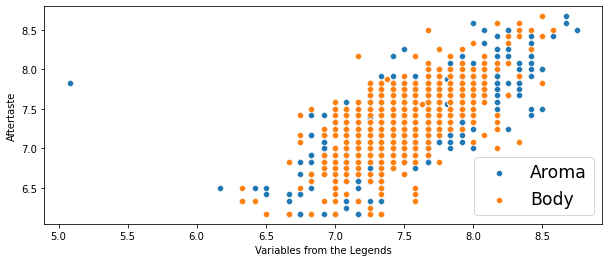

In [13]:
plt.figure(figsize=(10,4))
ax = sns.scatterplot(x = 'Aroma', y = 'Aftertaste', data =df)
sns.scatterplot(x = 'Body', y = 'Aftertaste', data = df)
plt.legend(['Aroma', 'Body'], loc='lower right', fontsize='xx-large')
plt.xlabel('Variables from the Legends')
plt.show()

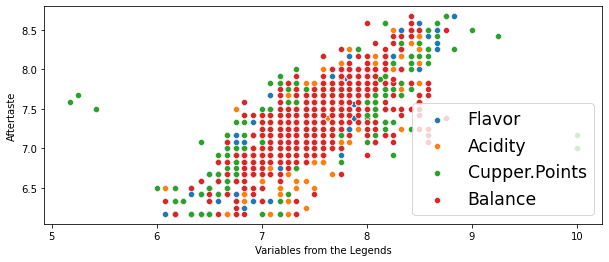

In [14]:
plt.figure(figsize=(10,4))
ax1 = sns.scatterplot(x = 'Flavor', y= 'Aftertaste', data=df)
ax2 = sns.scatterplot(x = 'Acidity' , y = 'Aftertaste', data = df)
ax3 = sns.scatterplot(x = 'Cupper.Points' , y = 'Aftertaste', data = df)
ax4 = sns.scatterplot(x = 'Balance' , y = 'Aftertaste', data = df)
plt.legend(['Flavor', 'Acidity', 'Cupper.Points', 'Balance'], loc='lower right', fontsize='xx-large')
plt.xlabel('Variables from the Legends')
plt.show()

In [15]:
final_df = df[['Aroma', 'Flavor', 'Aftertaste', 'Body', 'Balance', 'Uniformity','Clean.Cup', 'Sweetness', 'Cupper.Points', 'Acidity']]
final_df.to_csv('df_final.csv',index=False)

## 6. Discussion

Since, the analysis part was divided into two major parts; Exploratory Data Analysis and Visual Analysis (Visualization). The individual part has respective findings.Let’s discuss the first part of our analysis. The initial raw dataset has 44 columns of different data types and 1311 observations. Most of the columns have NULL values. The columns which are not necessary for further processes are dropped including those with many NULL values. There are highest number of coffee farms in Mexico followed by Columbia, Guatemala, and Brazil. The region Huila has highest number of Coffee Farms which is 112 and it is located. Almost 61% of Columbian coffee farms are located in Huila region.

From EDA heatmap, we found that the ‘Aftertaste’ attribute for determining the coffee quality is majorly correlated with Aroma, Flavor, Acidity, Body, Balance, Uniformity, CleanCup, Sweetness, CupperPoints. The other non-quality features Moisture, Category Two Defects are also visualized against Aftertaste but found to be very slightly correlated. When above quality features are visualized against Aftertaste in scatter plot, we found that Aroma, Acidity, CupperPoints Flavor, Balance, and Body are most correlated features. So, we considered these features for Model Fitting.


## 7. Model Fitting
a. The models of different algorithms are fitted in two manner. Firstly, more features to fit our model 

In [16]:
df = pd.read_csv('df_final.csv')
X = df[['Aroma', 'Acidity', 'Cupper.Points', 'Flavor','Balance', 'Body']]
y = df['Aftertaste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
algorithms = ['LinearRegression', 'Decision Tree', 'Random Forest', 'KNNeighbors', 'SupportVM', 'XGB']
training_acc = []
testing_acc = []

In [17]:
# Linear Regression
model_lr = LinearRegression(normalize=True)
model_lr.fit(X_train, y_train)
training_acc.append(model_lr.score(X_train, y_train))
testing_acc.append(model_lr.score(X_test, y_test))
#Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
training_acc.append(model_dt.score(X_train, y_train))
testing_acc.append(model_dt.score(X_test, y_test))

In [18]:
#Random Forest
model_rf = RandomForestRegressor(max_depth=5)
model_rf.fit(X_train, y_train)
training_acc.append(model_rf.score(X_train, y_train))
testing_acc.append(model_rf.score(X_test, y_test))
#KNN
model_knn = KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, y_train)
training_acc.append(model_knn.score(X_train, y_train))
testing_acc.append(model_knn.score(X_test, y_test))
#SVM
model_svr = SVR()
model_svr.fit(X_train, y_train)
training_acc.append(model_svr.score(X_train, y_train))
testing_acc.append(model_svr.score(X_test, y_test))
#XGBoost
model_x = XGBRegressor(n_estimators = 25, max_depth=2)
model_x.fit(X_train, y_train)
training_acc.append(model_x.score(X_train, y_train))
testing_acc.append(model_x.score(X_test, y_test))

b. The features are reduced to four, and fitted in the respective models

In [19]:
df = pd.read_csv('df_final.csv')
X = df[['Flavor','Balance', 'Acidity', 'Cupper.Points']]
y = df['Aftertaste']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
algorithms = ['LinearRegression', 'Decision Tree', 'Random Forest', 'KNNeighbors', 'SupportVM', 'XGB']
training_accl = []
testing_accl= []
# Linear Regression
model_lr = LinearRegression(normalize=True)
model_lr.fit(X_train, y_train)
training_accl.append(model_lr.score(X_train, y_train))
testing_accl.append(model_lr.score(X_test, y_test))
#Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
training_accl.append(model_dt.score(X_train, y_train))
testing_accl.append(model_dt.score(X_test, y_test))
#Random Forest
model_rf = RandomForestRegressor(max_depth=5)
model_rf.fit(X_train, y_train)
training_accl.append(model_rf.score(X_train, y_train))
testing_accl.append(model_rf.score(X_test, y_test))
#KNN
model_knn = KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train, y_train)
training_accl.append(model_knn.score(X_train, y_train))
testing_accl.append(model_knn.score(X_test, y_test))
#SVM
model_svr = SVR()
model_svr.fit(X_train, y_train)
training_accl.append(model_svr.score(X_train, y_train))
testing_accl.append(model_svr.score(X_test, y_test))

In [21]:
#XGBoost
model_x = XGBRegressor(n_estimators = 25, max_depth=2)
model_x.fit(X_train, y_train)
training_accl.append(model_x.score(X_train, y_train))
testing_accl.append(model_x.score(X_test, y_test))

## 8. Model Evaluation
Evaluation of Models trained with more Features and then less Features

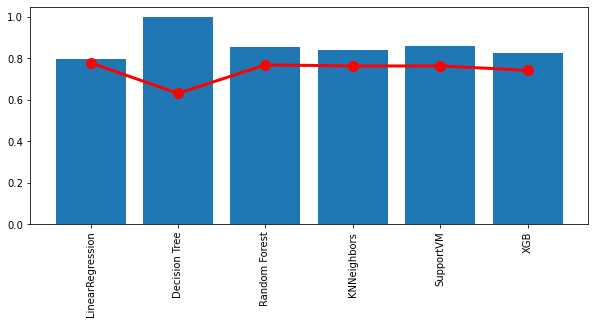

In [22]:
plt.figure(figsize=(10,4))
ax = plt.bar(algorithms,training_acc)
plt.plot(algorithms, testing_acc, color='r', lw=3, marker='o', ms=10)
plt.xticks(rotation='vertical')
plt.show()

In [23]:
model_evaluation = pd.DataFrame(data = {'Model': algorithms, 'Training Accuracy': training_acc, 'Testing Accuracy': testing_acc})
model_evaluation.head(10)

,Model,Training Accuracy,Testing Accuracy
0,LinearRegression,0.795596,0.778554
1,Decision Tree,0.999715,0.630847
2,Random Forest,0.852889,0.768431
3,KNNeighbors,0.839714,0.763077
4,SupportVM,0.858587,0.763344
5,XGB,0.825549,0.742055


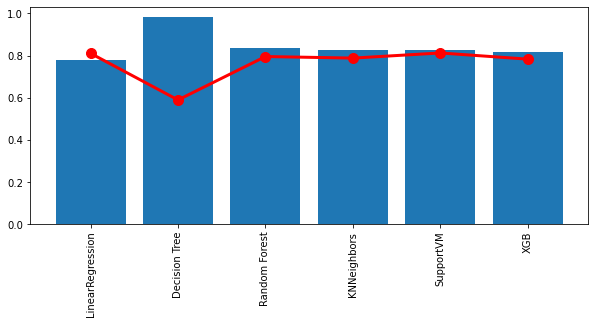

In [24]:
plt.figure(figsize=(10,4))
ax = plt.bar(algorithms,training_accl)
plt.plot(algorithms, testing_accl, color='r', lw=3, marker='o', ms=10)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
model_evaluation = pd.DataFrame(data = {'Model': algorithms, 'Training Accuracy': training_accl, 'Testing Accuracy': testing_accl})
model_evaluation.head(10)

,Model,Training Accuracy,Testing Accuracy
0,LinearRegression,0.779179,0.810678
1,Decision Tree,0.983414,0.589301
2,Random Forest,0.836610,0.795524
3,KNNeighbors,0.827339,0.788099
4,SupportVM,0.828582,0.812459
5,XGB,0.816722,0.783056


### Saving Best Model

In [26]:
joblib.dump(model_rf, 'model_svm.pkl')

['model_svm.pkl']